In [4]:
# notebooks/01_analisis_inicial.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración para visualizaciones
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ruta del dataset (ruta relativa al proyecto)
BASE_DIR = os.path.abspath("..")  # Sube un nivel desde notebooks/
DATA_PATH = os.path.join(BASE_DIR, "data", "pancreatic_cancer_structured.csv")

# Cargar el dataset
df = pd.read_csv(DATA_PATH)

In [5]:
print("🔍 Primeras filas del dataset:")
print(df.head(), "\n")


🔍 Primeras filas del dataset:
  sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0        S1        Cohort1          BPTB   33   F          1   NaN   
1       S10        Cohort1          BPTB   81   F          1   NaN   
2      S100        Cohort2          BPTB   51   M          1   NaN   
3      S101        Cohort2          BPTB   61   M          1   NaN   
4      S102        Cohort2          BPTB   62   M          1   NaN   

  benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                     NaN           11.7     1.83222  0.893219   52.94884   
1                     NaN            NaN     0.97266  2.037585   94.46703   
2                     NaN            7.0     0.78039  0.145589  102.36600   
3                     NaN            8.0     0.70122  0.002805   60.57900   
4                     NaN            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.1

In [ ]:
print(f"Dimensiones: {df.shape[0]} filas y {df.shape[1]} columnas\n")

📏 Dimensiones: 590 filas y 14 columnas



In [8]:
print("Tipos de datos por columna:")
df.info()

Tipos de datos por columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dty

In [ ]:
print("Valores nulos por columna:")
df.sum()

Valores nulos por columna:
sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
etiqueta_diagnostico         0
dtype: int64 



In [16]:
print("📈 Estadísticas descriptivas:")
print(df.describe(include='all'))

📈 Estadísticas descriptivas:
       sample_id patient_cohort sample_origin         age  sex   diagnosis  \
count        590            590           590  590.000000  590  590.000000   
unique       590              2             4         NaN    2         NaN   
top         S590        Cohort1          BPTB         NaN    F         NaN   
freq           1            332           409         NaN  299         NaN   
mean         NaN            NaN           NaN   59.079661  NaN    2.027119   
std          NaN            NaN           NaN   13.109520  NaN    0.804873   
min          NaN            NaN           NaN   26.000000  NaN    1.000000   
25%          NaN            NaN           NaN   50.000000  NaN    1.000000   
50%          NaN            NaN           NaN   60.000000  NaN    2.000000   
75%          NaN            NaN           NaN   69.000000  NaN    3.000000   
max          NaN            NaN           NaN   89.000000  NaN    3.000000   

       stage benign_sample_diagnos

Distribución de clases en 'diagnosis:
etiqueta_diagnostico
Pancreatitis          208
Cáncer de páncreas    199
Sano                  183
Name: count, dtype: int64 



C:\Users\pc\AppData\Local\Temp\ipykernel_25836\2473262541.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="etiqueta_diagnostico", palette="pastel", order=orden_clases)


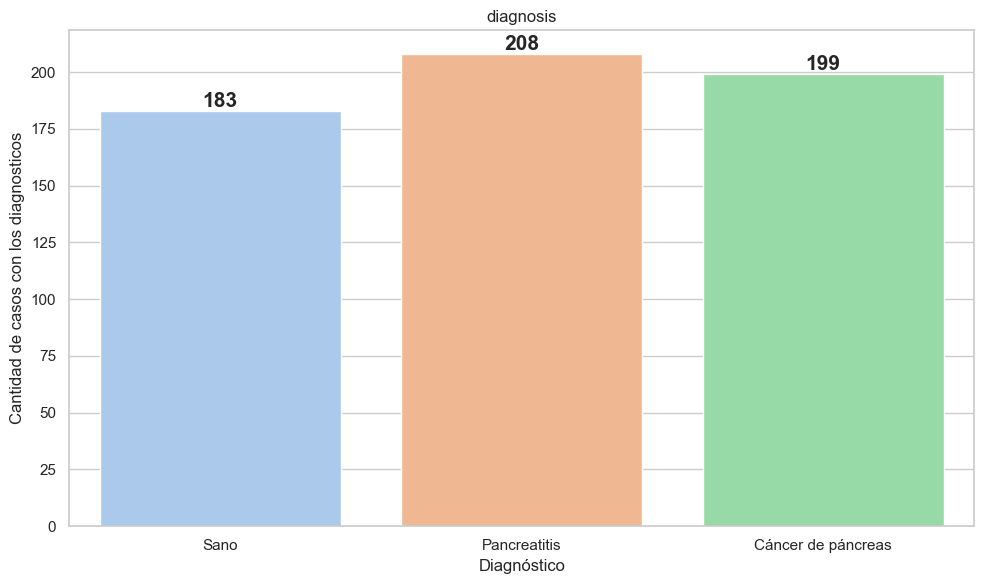

In [26]:
if 'Diagnosis' in df.columns or 'diagnosis' in df.columns:
    objetivo = 'Diagnosis' if 'Diagnosis' in df.columns else 'diagnosis'
    
    # Mapeo de valores numéricos a etiquetas comprensibles
    etiquetas = {
        1: "Sano",
        2: "Pancreatitis",
        3: "Cáncer de páncreas"
    }

    # Crear una nueva columna con las etiquetas
    df["etiqueta_diagnostico"] = df[objetivo].map(etiquetas)
    # mostramos la cantidad exacta de casa diagnostico con su etiqueta correspondiente
    print(f"Distribución de clases en '{objetivo}:")
    print(df["etiqueta_diagnostico"].value_counts(), "\n")

    orden_clases = ["Sano", "Pancreatitis", "Cáncer de páncreas"]

    # Crear el gráfico
    ax = sns.countplot(data=df, x="etiqueta_diagnostico", palette="pastel", order=orden_clases)
    plt.title(f"{objetivo}")
    plt.xlabel("Diagnóstico")
    plt.ylabel("Cantidad de casos con los diagnosticos")

    # Mostrar el número exacto arriba de cada barra
    for p in ax.patches:
        altura = p.get_height()
        ax.annotate(f"{int(altura)}", (p.get_x() + p.get_width() / 2, altura),
                    ha='center', va='bottom', fontsize=15, fontweight='bold')

    plt.tight_layout()
    plt.show()
# Revisamos si en la tabla de datos hay una columna que diga si una persona tiene cáncer o no, y si la encuentra Cuenta cuántas personas tienen cáncer y cuántas no, 
# además de hacer un gráfico de barras para que se vea claro. 
# Este gráfico de barras muestra cuántas personas hay en cada grupo de diagnóstico, que es la variable objetivo del proyecto (es decir, lo que queremos predecir: el tipo de diagnóstico).